# Part 1 – Python Programming & Data Manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

In [2]:
# Hata düzeltmeleri
df.replace({'O': '0', 'I': '1', ',': '.'}, regex=True, inplace=True)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,...,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,...,22.54,16.67,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
df = df.apply(pd.to_numeric, errors='ignore')

In [6]:
df.isna().sum().sort_values(ascending=False)

compactness_worst          5
symmetry_mean              2
perimeter_mean             2
area_mean                  2
concave points_se          1
fractal_dimension_se       1
radius_worst               1
perimeter_se               1
area_worst                 1
fractal_dimension_worst    1
concave points_mean        1
concave points_worst       1
smoothness_worst           0
perimeter_worst            0
concavity_worst            0
texture_worst              0
symmetry_worst             0
symmetry_se                0
diagnosis                  0
concavity_se               0
compactness_se             0
radius_mean                0
area_se                    0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
texture_mean               0
smoothness_se              0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                551 non-null    object 
 1   radius_mean              551 non-null    float64
 2   texture_mean             551 non-null    float64
 3   perimeter_mean           551 non-null    float64
 4   area_mean                551 non-null    float64
 5   smoothness_mean          551 non-null    float64
 6   compactness_mean         551 non-null    float64
 7   concavity_mean           551 non-null    float64
 8   concave points_mean      551 non-null    float64
 9   symmetry_mean            551 non-null    float64
 10  fractal_dimension_mean   551 non-null    float64
 11  radius_se                551 non-null    float64
 12  texture_se               551 non-null    float64
 13  perimeter_se             551 non-null    float64
 14  area_se                  551 no

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,551.0,14.140038,3.532928,6.981000,11.710000,13.370000,15.815000,28.11000
texture_mean,551.0,19.292069,4.283535,9.710000,16.195000,18.870000,21.805000,39.28000
perimeter_mean,551.0,92.045862,24.369022,43.790000,75.235000,86.240000,104.500000,188.50000
area_mean,551.0,656.267514,353.468957,143.500000,420.400000,551.100000,785.600000,2501.00000
smoothness_mean,551.0,0.096402,0.014168,0.052630,0.086210,0.095940,0.105400,0.16340
compactness_mean,551.0,0.104027,0.052651,0.019380,0.064710,0.092630,0.129850,0.34540
concavity_mean,551.0,0.088641,0.079905,0.000000,0.029570,0.060150,0.126950,0.42680
concave points_mean,551.0,0.049070,0.039033,0.000000,0.020335,0.033500,0.073820,0.20120
symmetry_mean,551.0,0.180752,0.027159,0.106000,0.161900,0.178400,0.195300,0.30400
fractal_dimension_mean,551.0,0.062702,0.006993,0.049960,0.057670,0.061440,0.066070,0.09744


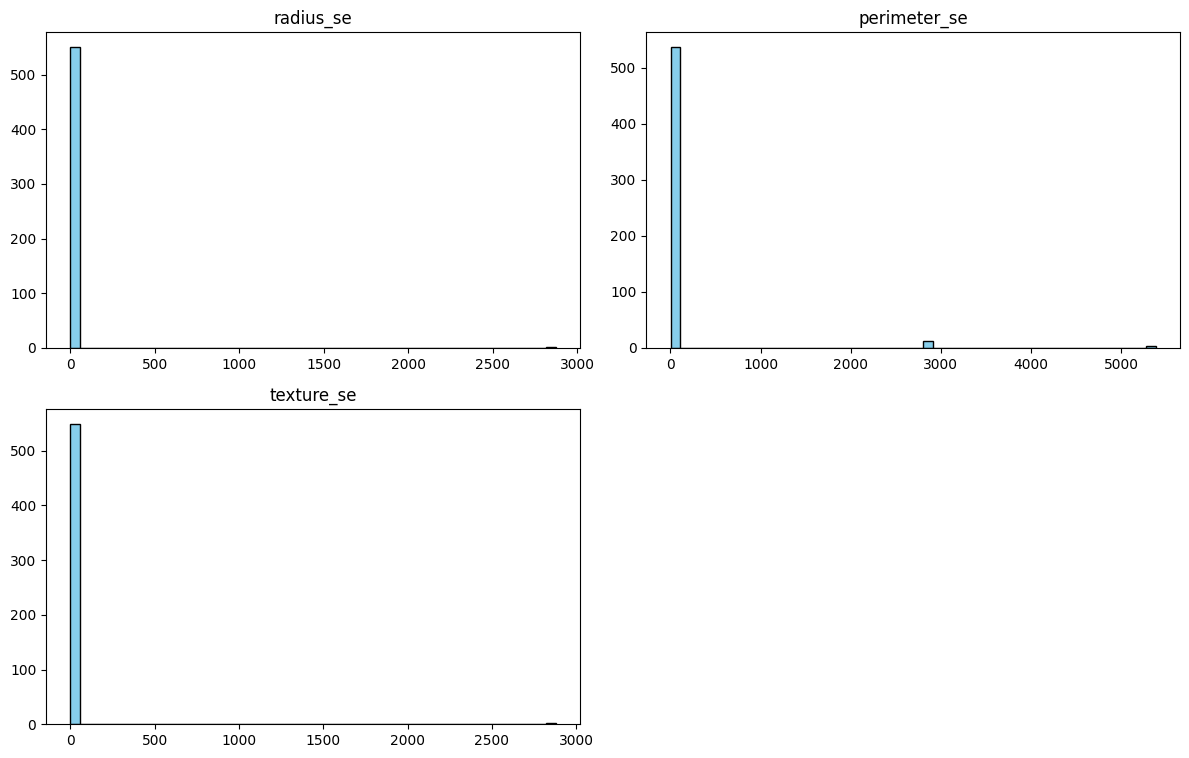

In [10]:
kontrol = df[['radius_se','perimeter_se','texture_se']]
kontrol.hist(bins=50, figsize=(12,8), color='skyblue', edgecolor='black', grid=False)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [11]:
# Belli ki yanlış veri girişi var. Bunları cappingle düzeltebilir veya imputer yardımıyla düzenleyebiliriz.
# Fakat bu bir sağlık verisi olduğu için, bu tarz yanlış girildiği belli olan verileri çıkartmanın daha doğru olduğunu düşündüm.
# 3 kolonda da 2000 ve üzeri değerler abeslik yaratıyor.
# filtre ayarlayıp bu değerleri kaldırıyorum. 
# Aynı nedenden ötürü boş verileri de kaldırıyorum.

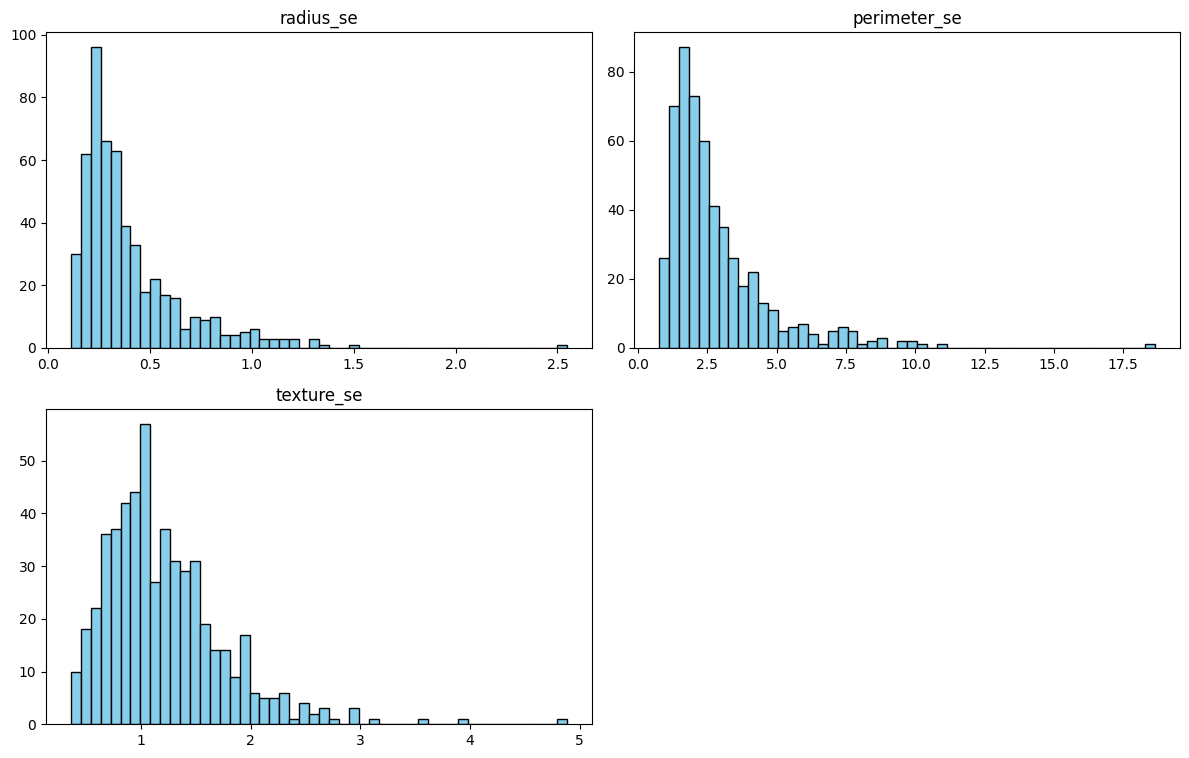

In [12]:
df_filtered = df[(df['perimeter_se'] <= 1000) & (df['texture_se'] <= 1000) & (df['radius_se'] <= 1000)]

kontrol = df_filtered[['radius_se','perimeter_se','texture_se']]
kontrol.hist(bins=50, figsize=(12,8), color='skyblue', edgecolor='black', grid=False)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
# Tanı sütunumuzdaki kategorik verileri de numerik hale getiriyoruz.
df_filtered['diagnosis'] = df_filtered['diagnosis'].map({'M': 1, 'B': 0})

C:\Users\aykut\AppData\Local\Temp\ipykernel_9664\754948435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diagnosis'] = df_filtered['diagnosis'].map({'M': 1, 'B': 0})


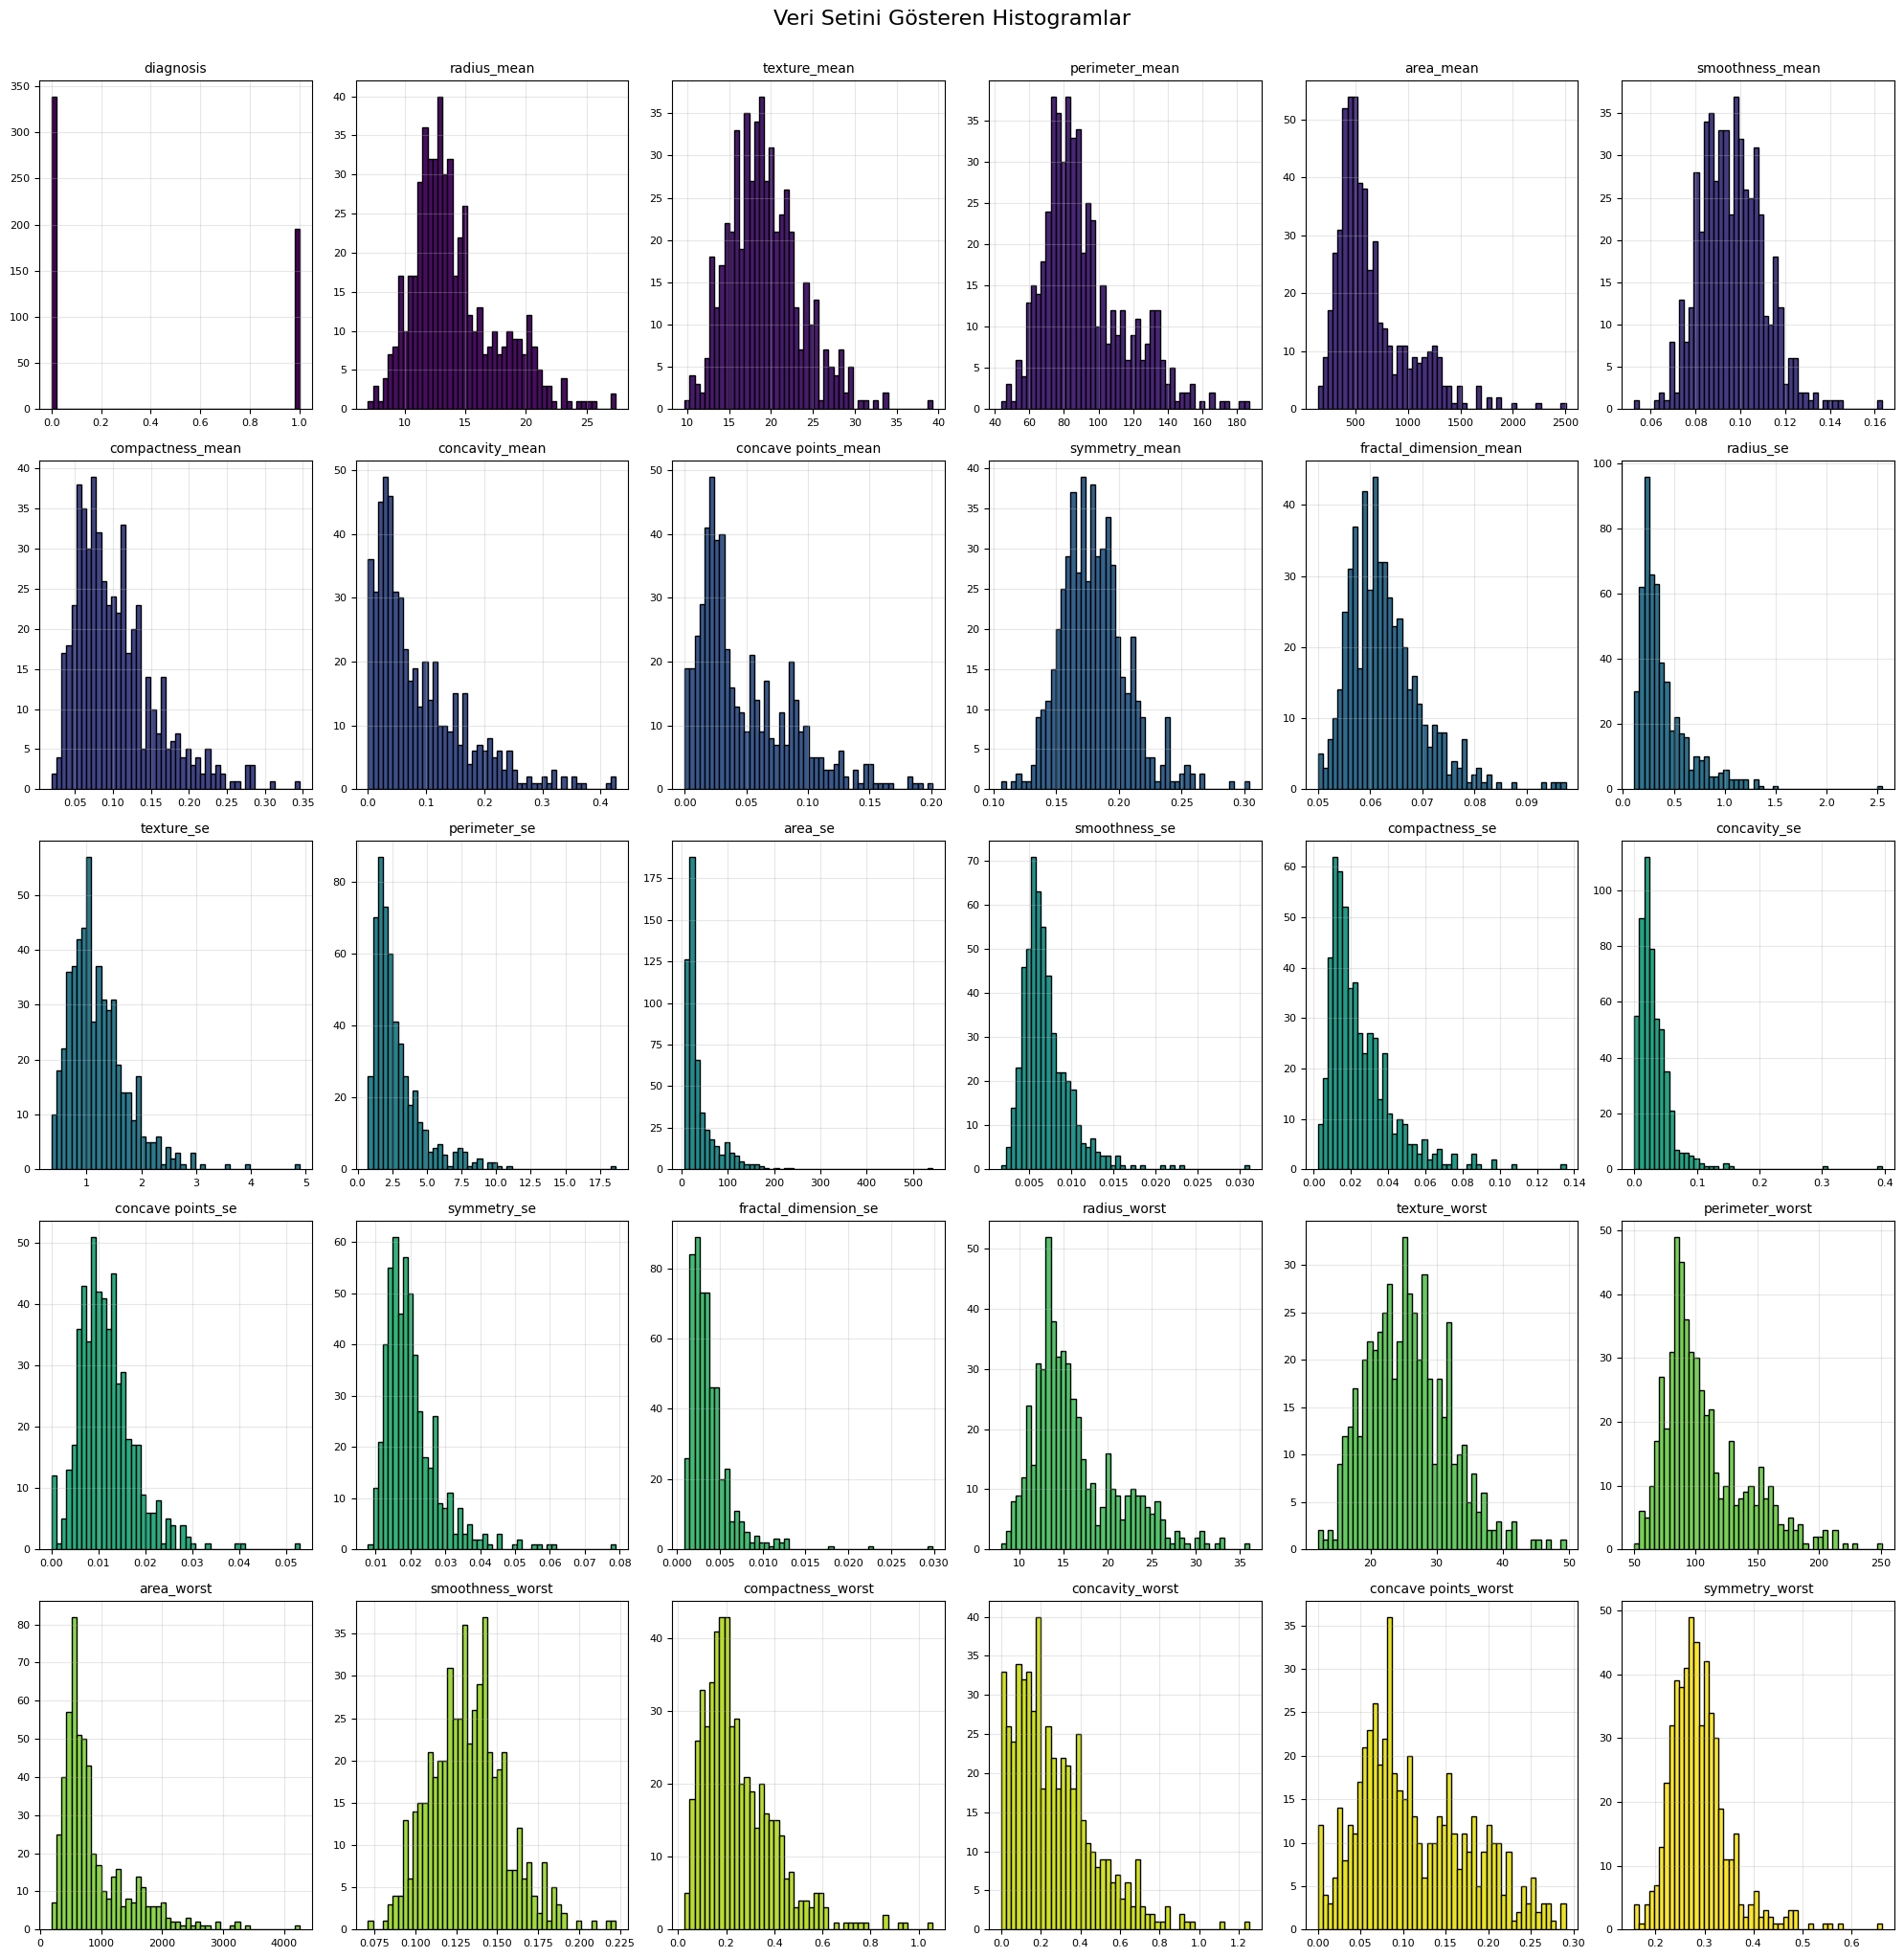

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))
colors = plt.cm.viridis(np.linspace(0, 1, 30))

for i, ax in enumerate(axes.flatten()):
    if i < df_filtered.shape[1]:
        feature_name = df_filtered.columns[i]
        df_filtered[feature_name].hist(ax=ax, bins=50, color=colors[i], edgecolor='black')
        ax.set_title(feature_name, fontsize=10)
        ax.tick_params(axis='both', labelsize=8)
        ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.suptitle('Veri Setini Gösteren Histogramlar', fontsize=16, y=1.02)
# plt.savefig('toplam_histogramlar.png')
plt.show()


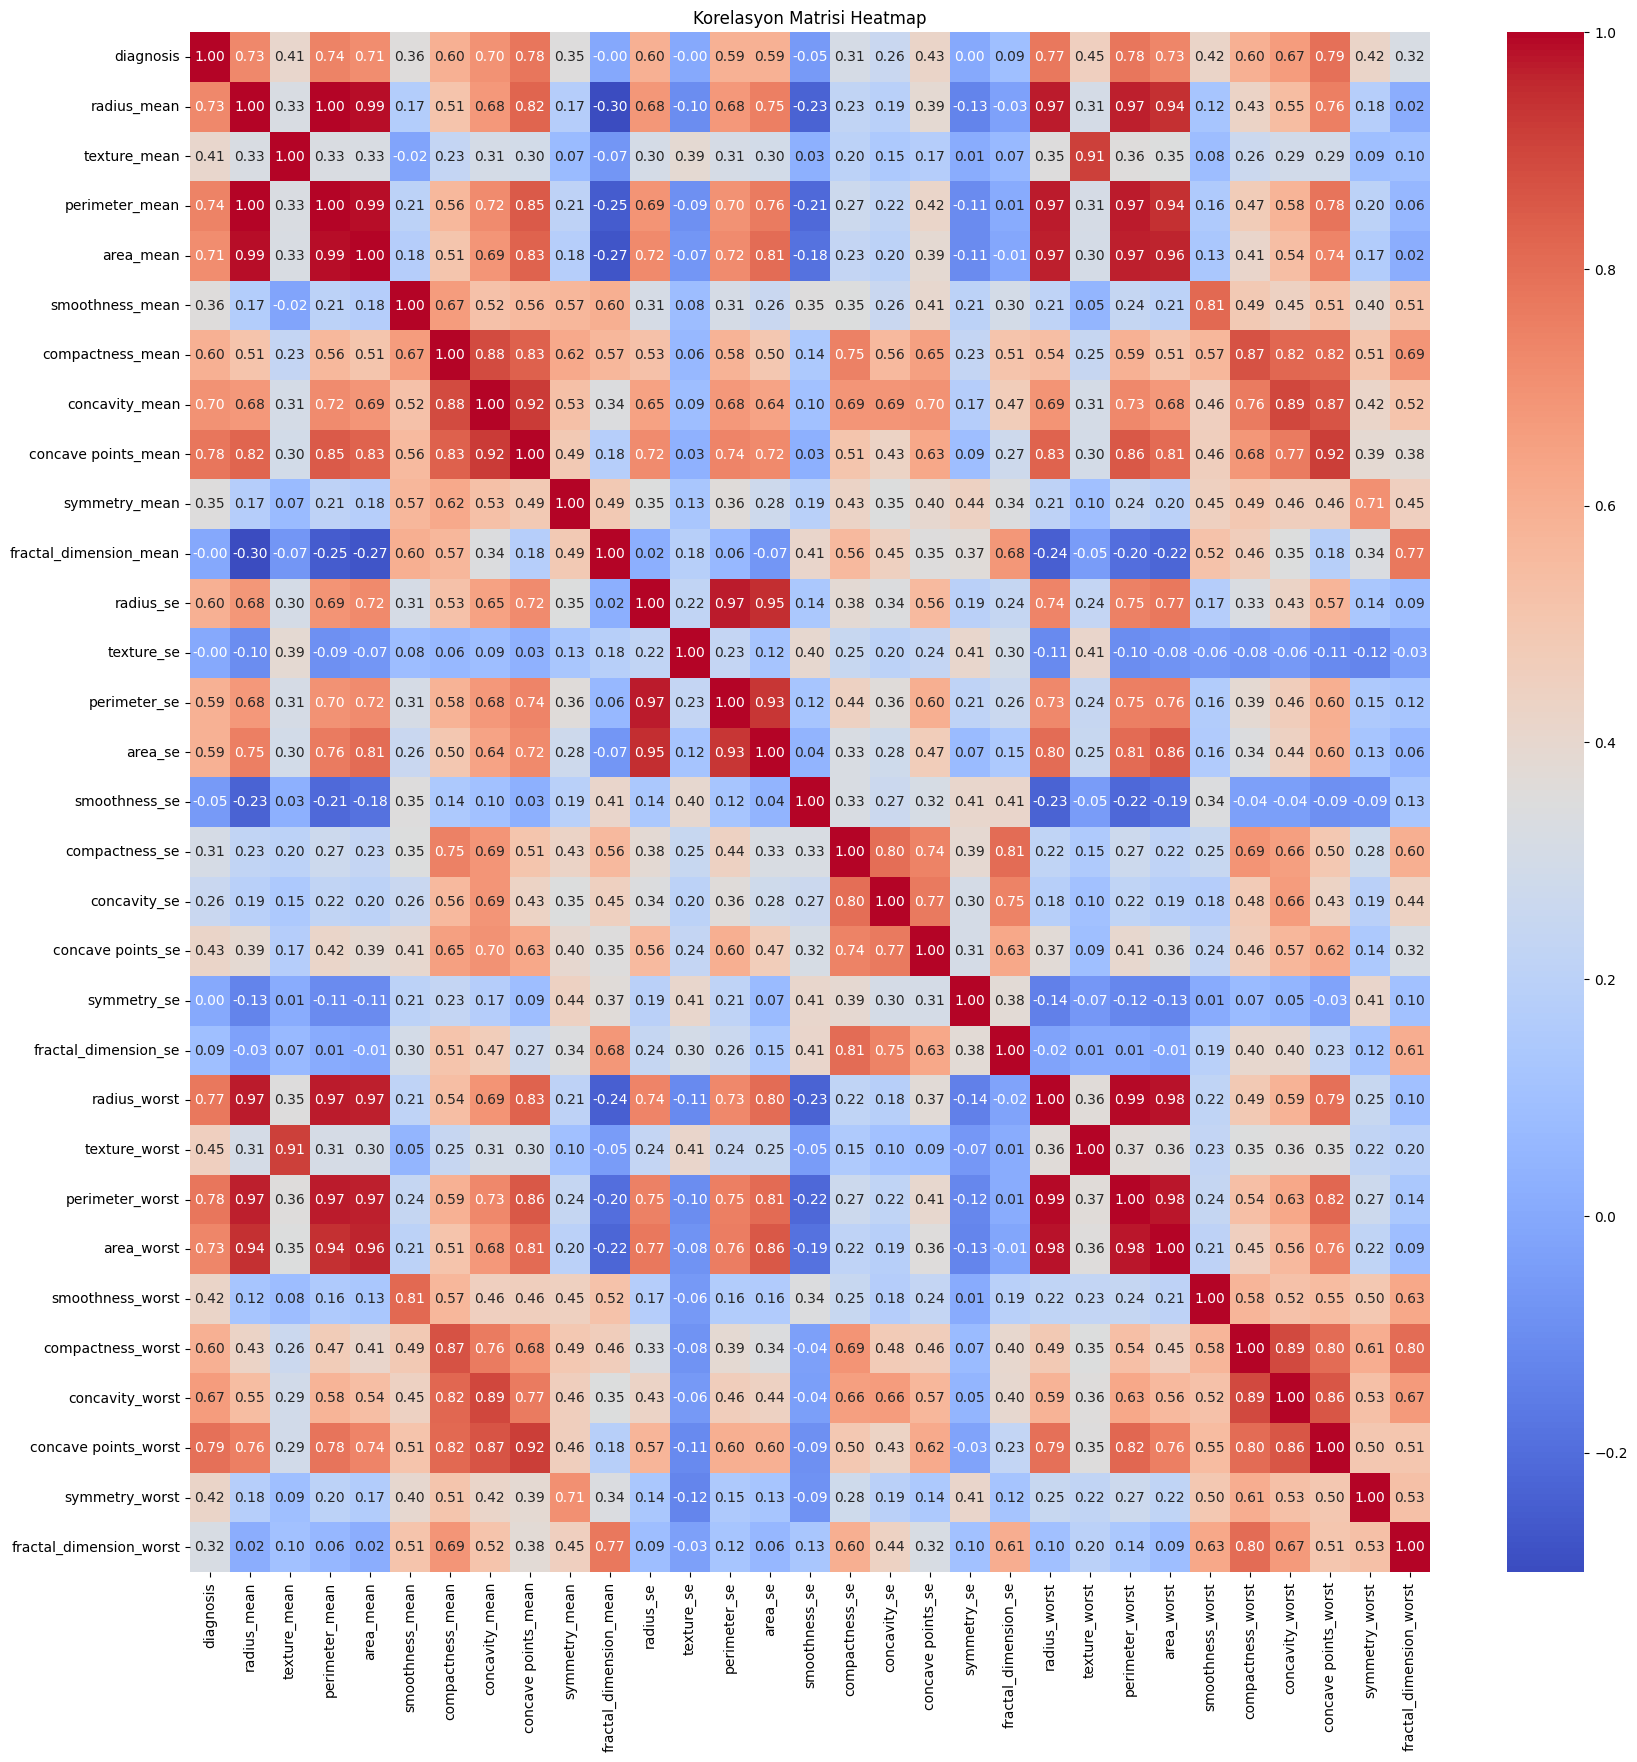

In [15]:
# Yanlış ve eksik verilerden kurtulduk. Korelasyon hesabına geçiyoruz. Öğrenmede kullanılmaası gereken sütunlara bakacağız.
corr_matrix = df_filtered.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi Heatmap')
# plt.savefig('korelasyon.png')
plt.show()

In [16]:
# Isı haritasına baktığımızda korelasyon değerleri 1'e çok yakın radius_mean,perimeter_mean,area_mean kolonlarını ve bunların worst kolonlarını görüyoruz. Bunlardan sadece 1'i modelimiz için yeterli olacaktır. bu nedenle sadeece radius_mean alıyoruz. Diğer öbekler için de yapıyoruz.
# Bütün mean kolonlarla worst kolonları arasında da Çoklu Kollineerlik. Bu durum regresyon analizi sırasında sorunlara yol açabilir.

#WORST kolonları çıkarıyoruz

worst_cols = df_filtered.iloc[:,21:31].columns
df_filtered_extra = df_filtered.drop(worst_cols, axis=1)

#perimeter ve area kolonlarını da atıyoruz.
df_filtered_extra.drop(columns=['perimeter_mean','perimeter_se','area_mean','area_se'], axis=1, inplace=True)
# bükeylikle ilgili kolonları da çıkarıyoruz
df_filtered_extra.drop(columns=['concavity_mean','concavity_se','concave points_mean','concave points_se'],axis=1, inplace=True)

In [17]:
df_filtered_extra.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

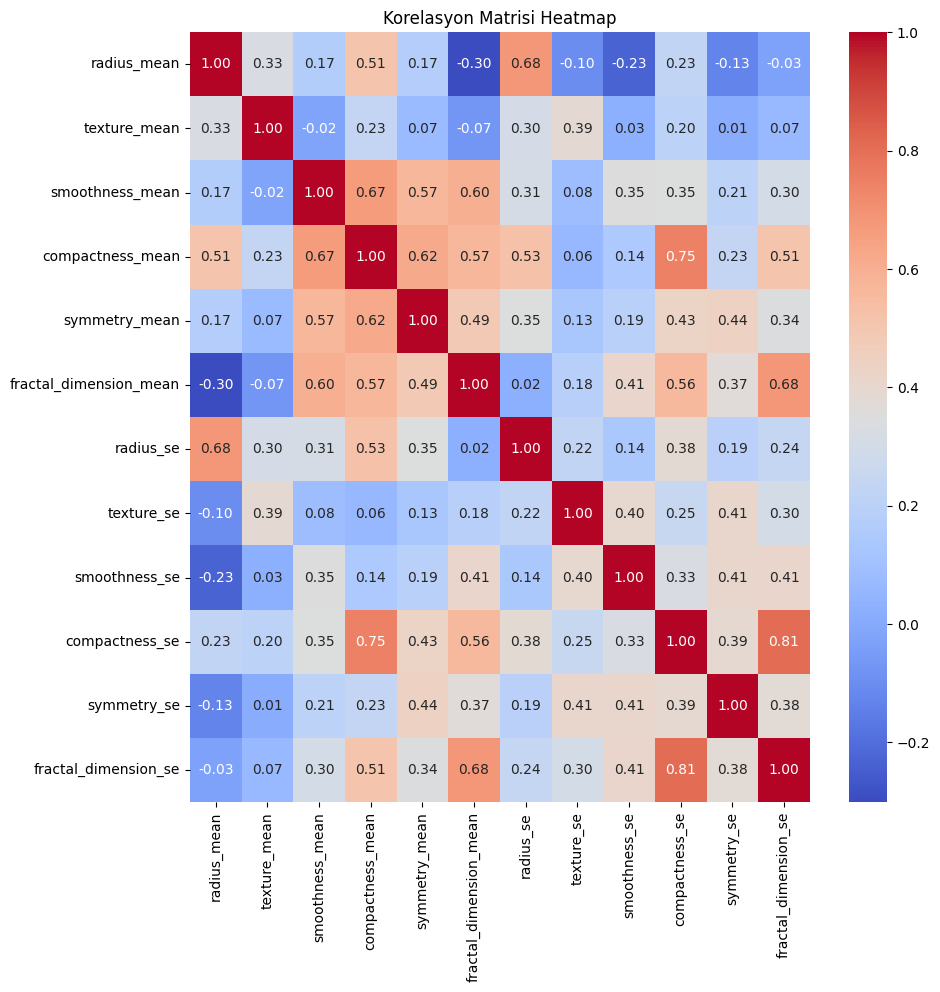

In [18]:
corr_matrix = df_filtered_extra.drop('diagnosis',axis=1).corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi Heatmap')
# plt.savefig('son_korr.png')
plt.show()

# Part 2 – Machine Learning

In [19]:
X = df_filtered_extra.drop('diagnosis',axis=1)
y = df_filtered_extra['diagnosis']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [21]:
## SCALING
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

In [23]:

models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
}

param_grids = {
    'Naive Bayes': {},
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'SVM': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
}


for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    
    print(f"{model_name}:")
    print("En iyi parametreler:", grid_search.best_params_)
    print("En iyi çapraz doğrulama skoru:", grid_search.best_score_)

    
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Test seti performansı:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")


Naive Bayes:
En iyi parametreler: {}
En iyi çapraz doğrulama skoru: 0.8898495212038304
Test seti performansı:
Accuracy: 0.8692
Precision: 0.8293
Recall: 0.8293
F1 Score: 0.8293


Decision Tree:
En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
En iyi çapraz doğrulama skoru: 0.9204377564979481
Test seti performansı:
Accuracy: 0.8505
Precision: 0.8378
Recall: 0.7561
F1 Score: 0.7949


Logistic Regression:
En iyi parametreler: {'C': 1}
En iyi çapraz doğrulama skoru: 0.9273871409028727
Test seti performansı:
Accuracy: 0.9346
Precision: 0.9474
Recall: 0.8780
F1 Score: 0.9114


Random Forest:
En iyi parametreler: {'max_depth': 20, 'n_estimators': 100}
En iyi çapraz doğrulama skoru: 0.9390424076607389
Test seti performansı:
Accuracy: 0.9159
Precision: 0.9211
Recall: 0.8537
F1 Score: 0.8861


SVM:
En iyi parametreler: {'C': 100, 'kernel': 'linear'}
En iyi çapraz doğrulama skoru: 0.9320109439124489
Test seti performansı:
Accuracy: 0.9533
Precision: 0.9737
Rec

In [24]:
def plot_confusion_matrix(y_true, y_pred, labels=['Benign', 'Malignant']):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    # plt.savefig('CMRan.png')
    plt.show()

In [25]:
random = RandomForestClassifier(max_depth=None, n_estimators=100)
random.fit(X_train, y_train)
y_pred_rand = random.predict(X_test)

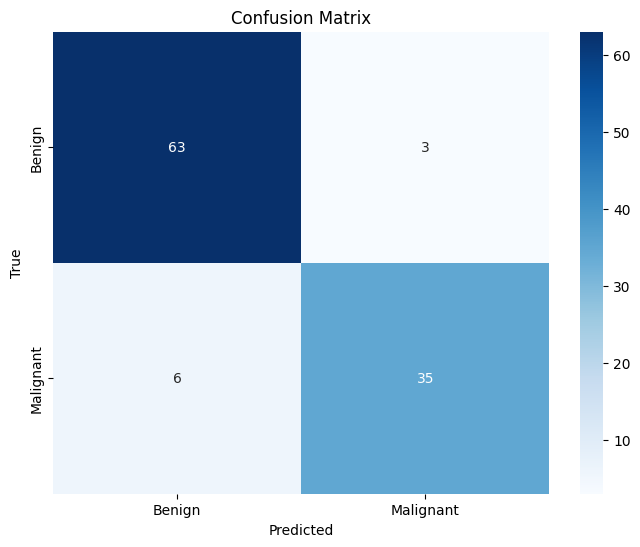

In [26]:
plot_confusion_matrix(y_test, y_pred_rand)



In [27]:
svm_model = SVC(C=100, kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [35]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_svm, target_names=['benign', 'malignant'])
print(report)

              precision    recall  f1-score   support

      benign       0.94      0.98      0.96        66
   malignant       0.97      0.90      0.94        41

    accuracy                           0.95       107
   macro avg       0.96      0.94      0.95       107
weighted avg       0.95      0.95      0.95       107



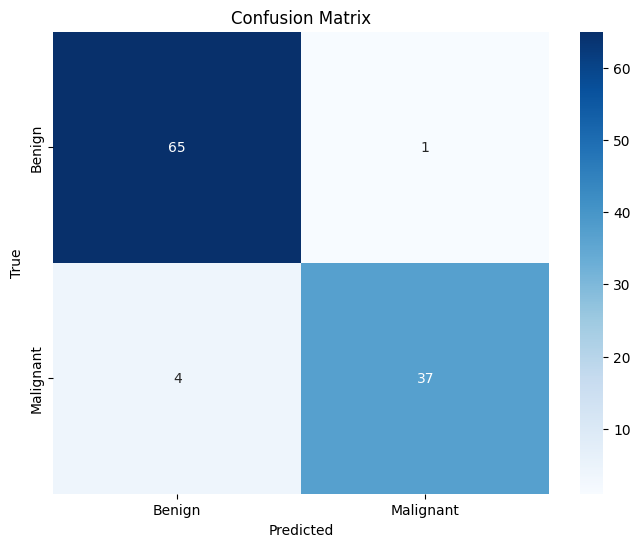

In [28]:
plot_confusion_matrix(y_test, y_pred_svm)

In [29]:
from sklearn.metrics import roc_curve, auc

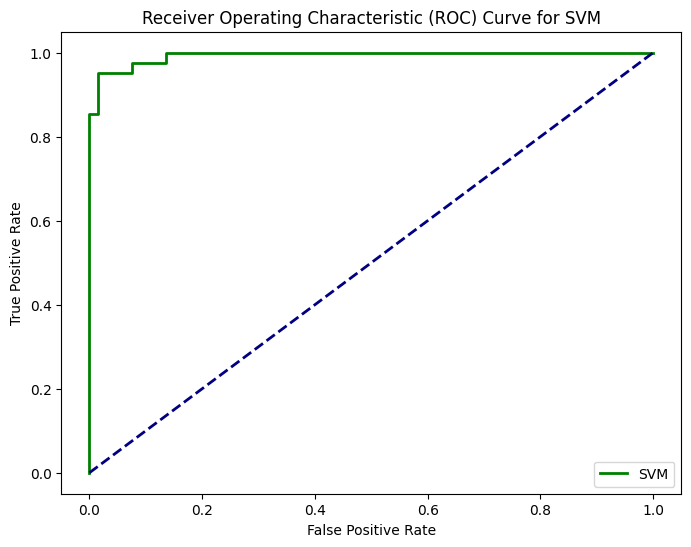

In [30]:
svm_model = SVC(C=100, kernel='linear')

svm_model.fit(X_train, y_train)


y_scores_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
# plt.savefig('ROC.png')
plt.show()

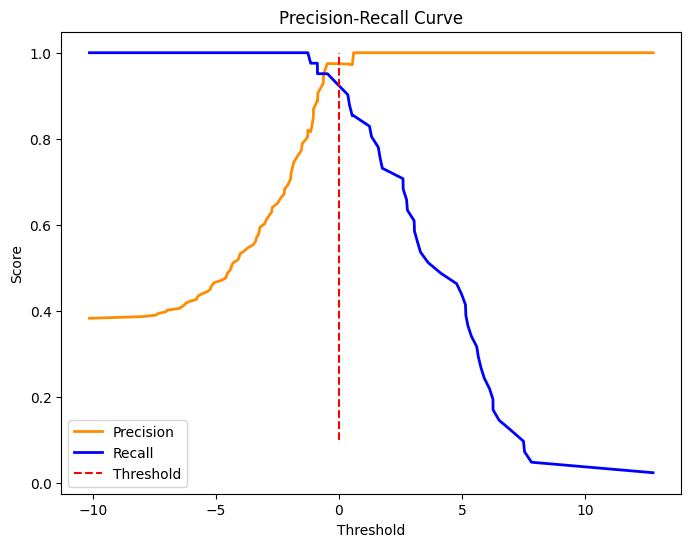

In [31]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_svm)

# Precision ve Recall arasındak

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], color='darkorange', lw=2, label='Precision')
plt.plot(thresholds, recall[:-1], color='blue', lw=2, label='Recall')
plt.vlines(0,0.1,1.0, color='red', linestyle='--', label='Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
# plt.savefig('pre_rec.png')
plt.show()